# Legendary Pokemon Prediction



## Introduction

The Pokemon franchise was created by Satoshi Tajiri in 1996, and initially introduced as video game series. The games were very successful and brought huge profit to the company. Pokemon was also introduced in other media such as animations, films, and trading-card-game. Currently, in the year 2022, the Pokemon brand is the world biggest media franchises with estimated all-time sales of \$100 billions [1].

One of the fascinating part of Pokemon is existance of legendary Pokemons. They are very rare and generally stronger than other pokemons. Through this report, the data-set of 721 Pokemons will be used to develop several machine learning models to correctly classify legendary Pokemons. In details, for the classification methods: logistic regression, support vector machine (SVM), random forest, and K-nearest neighbors (KNN) are utilized. Also, to improve the performance of classification further, Principal Component Analaysis (PCA) are applied on the logistic regression and KNN algorithms. The data-set used in this report is derived from the Kaggle website created by Asier[2].

Note that Machine Learning(ML) models are trained on a laptop with Intel Core i7-1165G7 CPU, Intel Iris Xe GPU and 16G memory. Also jupyter notebook's source code is publicly uploaded on GitHub https://github.com/seung7/Legendary-Pokemon-Prediction-ML


In [1]:
#Nessary Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns; sns.set()
import random
random_state=8 
np.random.seed(random_state)
random.seed(random_state)

## Data Analysis and Pre-Processing
### Data Attributes
Pokemon's attributes are described in below:

* **#**: ID for each Pokemon
* **Name**: Name of the Pokemon
* **Type 1**: Primary Type
* **Type 2**: Secondary Type
* **Total**: Sum of HP, Attack, Defense, Sp_Atk, Sp_Def, Speed
* **HP**: Health Point
* **Attack**: Attack point
* **Defense**: Defense point
* **Sp_Atk**: Special Attack point
* **Sp_Def**: Special Defense point
* **Speed**: Speed of the Pokemon
* **Generation**: Number of generation of the Pokemon when the Pokemon was introduced
* **isLegendary**: if true, the Pokemon is the legendary Pokemon
* **Color**: Color of the Pokemon
* **hasGender**: if True, the Pokemon has a gender
* **Pr_male**: if the Pokemon has a gender, the probability of being a male 
* **Egg_Group_1**: if two Pokemons are belong to the same Egg Group, They are interbreedable
* **Egg_Group_2**: Secondary Egg Group
* **hasMegaEvolution**: if true, the pokemon can evolve into its mega form
* **Height_m**: Height of the Pokemon in meters
* **Weight_kg**: Weight of the Pokemon in kilograms
* **Catch_Rate**: Catch Rate. Higher rate indicates that the Pokemon is can be easily catched.
* **Body_style**: Body shape of the Pokemon

In [2]:
#check data's attributes
pokeData = pd.read_csv('./pokemon_data.csv')
pokeData.head(10)

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,Red,True,0.875,Monster,Dragon,True,1.70,90.5,45,bipedal_tailed
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,Blue,True,0.875,Monster,Water_1,False,0.51,9.0,45,bipedal_tailed
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,...,Blue,True,0.875,Monster,Water_1,False,0.99,22.5,45,bipedal_tailed
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,...,Blue,True,0.875,Monster,Water_1,True,1.60,85.5,45,bipedal_tailed
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,...,Green,True,0.500,Bug,NaN,False,0.30,2.9,255,insectoid


### Number of Legendary Pokemons

We are interesting in classifying legendary Pokemons. In our sample, there are 46 legendary Pokemons, and 675 non-legendary Pokemons.

46 675


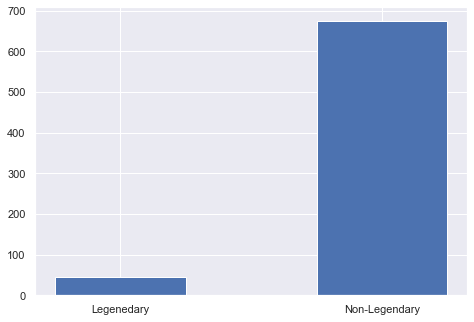

In [3]:
#Total number of legendaries
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Legenedary', 'Non-Legendary']
count1= pokeData[pokeData['isLegendary']==1]['isLegendary'].count()
count2= pokeData[pokeData['isLegendary']==0]['isLegendary'].count() 
Numbers=[count1, count2]
bars=ax.bar(langs, Numbers, width = 0.5)

print(count1, count2)
#displaying number for each bar. This part is commented out for compatibility with google colab.
#ax.bar_label(bars)
plt.show()

### Data Pre-processing

If an attribute has any empty values, it has to be opted out before training the machine learning(ML) models. 371 Pokemons are missing 'Type\_2', 77 Pokemons are missing 'Pr\_male', and 530 Pokemons are missing 'Egg\_Group\_2'. These fields cannot be used for training. Therefore, they are dropped. 

'Name' and 'Number' fields of the Pokemons are opted out as well because each Pokemons has their unique name and number, and they have no relationship for a Pokemon being a legendary.

In [4]:
#check if attributes have missing values
missing = pd.DataFrame({'Undefined Data ':pokeData.isna().sum(), 
                        })
missing

,Undefined Data
Number,0
Name,0
Type_1,0
Type_2,371
Total,0
HP,0
Attack,0
Defense,0
Sp_Atk,0
Sp_Def,0


In [5]:
#Drop attributes that has empty values.
pokeData=pokeData.drop(['Type_2', 'Pr_Male', 'Egg_Group_2'], axis=1)

#Drop numercial attributes that cannot be evaluated.
pokeData=pokeData.drop(['Name','Number'], axis=1)
pokeData.head(10)

,Type_1,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,Color,hasGender,Egg_Group_1,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,Grass,318,45,49,49,65,65,45,1,False,Green,True,Monster,False,0.71,6.9,45,quadruped
1,Grass,405,60,62,63,80,80,60,1,False,Green,True,Monster,False,0.99,13.0,45,quadruped
2,Grass,525,80,82,83,100,100,80,1,False,Green,True,Monster,True,2.01,100.0,45,quadruped
3,Fire,309,39,52,43,60,50,65,1,False,Red,True,Monster,False,0.61,8.5,45,bipedal_tailed
4,Fire,405,58,64,58,80,65,80,1,False,Red,True,Monster,False,1.09,19.0,45,bipedal_tailed
5,Fire,534,78,84,78,109,85,100,1,False,Red,True,Monster,True,1.70,90.5,45,bipedal_tailed
6,Water,314,44,48,65,50,64,43,1,False,Blue,True,Monster,False,0.51,9.0,45,bipedal_tailed
7,Water,405,59,63,80,65,80,58,1,False,Blue,True,Monster,False,0.99,22.5,45,bipedal_tailed
8,Water,530,79,83,100,85,105,78,1,False,Blue,True,Monster,True,1.60,85.5,45,bipedal_tailed
9,Bug,195,45,30,35,20,20,45,1,False,Green,True,Bug,False,0.30,2.9,255,insectoid


Categorical values have to converted into numerical values as well. 
Firstly, 'True' value of any Boolean fields(isLegendary, hasGender, hasMegaEvolution) is converted into integer 1, and 'False' is converted to 0. 
Secondly, non-Boolean categorical values(Type\_1, Color, Body\_style, Egg\_Group\_1) are converted into numerical values by using Pandas' get\_dummies method.

In [6]:
#convert true to integer type 1, and false to interger type 0
pokeData['isLegendary']=pokeData['isLegendary'].astype(int)
pokeData['hasGender']=pokeData['hasGender'].astype(int)
pokeData['hasMegaEvolution']=pokeData['hasMegaEvolution'].astype(int)

#convert categorical data to numerical values
pokeData=pd.get_dummies(pokeData, columns=['Type_1','Color','Body_Style','Egg_Group_1'])
pokeData

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,...,Egg_Group_1_Field,Egg_Group_1_Flying,Egg_Group_1_Grass,Egg_Group_1_Human-Like,Egg_Group_1_Mineral,Egg_Group_1_Monster,Egg_Group_1_Undiscovered,Egg_Group_1_Water_1,Egg_Group_1_Water_2,Egg_Group_1_Water_3
0,318,45,49,49,65,65,45,1,0,1,...,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,0,1,...,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,0,1,...,0,0,0,0,0,1,0,0,0,0
3,309,39,52,43,60,50,65,1,0,1,...,0,0,0,0,0,1,0,0,0,0
4,405,58,64,58,80,65,80,1,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,680,126,131,95,131,98,99,6,1,0,...,0,0,0,0,0,0,1,0,0,0
717,600,108,100,121,81,95,95,6,1,0,...,0,0,0,0,0,0,1,0,0,0
718,600,50,100,150,100,150,50,6,1,0,...,0,0,0,0,0,0,1,0,0,0
719,600,80,110,60,150,130,70,6,1,0,...,0,0,0,0,0,0,1,0,0,0


### Correlation

Before performing classification, correlation between 'isLegendary' field and all the other fields are analyzed by using Pandas' corr method.
The pie chart in Figure 2 shows the top 10 attributes that have the most correlation to the 'isLegendary' field.

Fields that shows the highest correlation is :
1. Egg_Groups_1_Undiscovered
2. hasGender
3. Total
4. Weight_kg
5. Sp_Atk
6. Sp_Def
7. Height_m
8. Catch_Rate
9. Attack
10. Speed


([<matplotlib.patches.Wedge at 0x17a95131a30>,
 [Text(0.929761237183094, 0.58782994295269, 'Egg_Group_1_Undiscovered'),
  Text(-0.026521946099447, 1.0996802200526743, 'hasGender'),
  Text(-0.8196355512931994, 0.73361949473572, 'Total'),
  Text(-1.0971042680099103, 0.07976355755881734, 'Weight_kg'),
  Text(-0.947603563727517, -0.5586121069319119, 'Sp_Atk'),
  Text(-0.5079710636580911, -0.9756871417037675, 'Sp_Def'),
  Text(0.019401070244507303, -1.0998288950893078, 'Height_m'),
  Text(0.5134459350316114, -0.9728171831333544, 'Catch_Rate'),
  Text(0.8860821889196729, -0.6518115943118235, 'Attack'),
  Text(1.07643253336436, -0.2264795821145607, 'Speed')],
 [Text(0.5071424930089603, 0.32063451433783086, '17.95%'),
  Text(-0.014466516054243816, 0.599825574574186, '14.88%'),
  Text(-0.4470739370690178, 0.4001560880376654, '11.12%'),
  Text(-0.5984205098235874, 0.04350739503208218, '9.81%'),
  Text(-0.5168746711241001, -0.3046975128719519, '9.45%'),
  Text(-0.277075125631686, -0.5321929863838

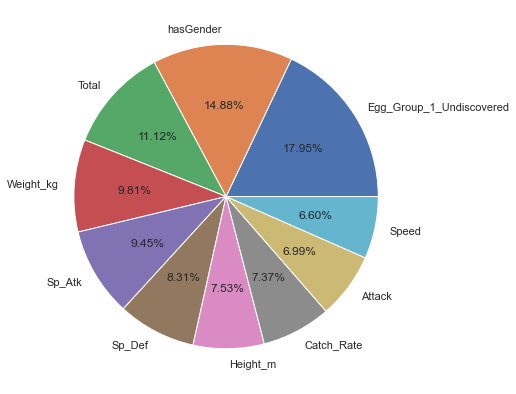

In [7]:
#Check top 10 attributes that is highly correlated to 'isLegendary'
correlations = pokeData.corr(method='pearson').abs()
topTenCorr=correlations['isLegendary'].sort_values(ascending=False).head(11)

plt.figure(figsize=(10,7))
plt.pie(topTenCorr[1:], labels=topTenCorr._stat_axis[1:],autopct='%1.2f%%')

### Data Splits

After pre-processing the data-set, out of 721 data, 70 percentage of them are randomly set as a training data-set, and remaining 30 percentage are set as a testing data-set. 


In [8]:
# Split data to training set and testing set
X = pokeData.drop(['isLegendary'], axis = 1)
y = pokeData['isLegendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = random_state)

#check both y_train and y_test has legendary pokemon
print(y_train.value_counts())
print(y_test.value_counts())
X.head(10)

0    470
1     34
Name: isLegendary, dtype: int64
0    205
1     12
Name: isLegendary, dtype: int64


,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,hasMegaEvolution,...,Egg_Group_1_Field,Egg_Group_1_Flying,Egg_Group_1_Grass,Egg_Group_1_Human-Like,Egg_Group_1_Mineral,Egg_Group_1_Monster,Egg_Group_1_Undiscovered,Egg_Group_1_Water_1,Egg_Group_1_Water_2,Egg_Group_1_Water_3
0,318,45,49,49,65,65,45,1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,405,60,62,63,80,80,60,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,525,80,82,83,100,100,80,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,309,39,52,43,60,50,65,1,1,0,...,0,0,0,0,0,1,0,0,0,0
4,405,58,64,58,80,65,80,1,1,0,...,0,0,0,0,0,1,0,0,0,0
5,534,78,84,78,109,85,100,1,1,1,...,0,0,0,0,0,1,0,0,0,0
6,314,44,48,65,50,64,43,1,1,0,...,0,0,0,0,0,1,0,0,0,0
7,405,59,63,80,65,80,58,1,1,0,...,0,0,0,0,0,1,0,0,0,0
8,530,79,83,100,85,105,78,1,1,1,...,0,0,0,0,0,1,0,0,0,0
9,195,45,30,35,20,20,45,1,1,0,...,0,0,0,0,0,0,0,0,0,0


## Classification
### Logisitic Regression, Linear SVM, Poly SVM, Random Forest, and KNN

To evaluate classifiers, two evaluation metrics are used throughout this report: accuracy score and precision score
Next, models are developed with linear SVM, poly SVM, random forest, and KNN. Before developing these models, cross-validation with 5 folds is used to tune their hyper parameters for each models. The Result is shown below:

* Logistic Regression -> Accuracy: 0.977, Precision: 0.818
* Linear SVM    -> Accuracy: 0.982, Precision: 0.900
* Poly SVM      -> Accuracy: 0.968, Precision: 0.727
* Random Forest -> Accuracy: 0.991, Precision: 0.857
* KNN           -> Accuracy: 0.977, Precision: 0.818

Linear SVM's result of accuracy score of 0.982 which is higher than poly SVM's accuracy score of 0.968. Therefore, the 'isLegendary' field is more linearly related to the rest of data-set than being polynomially related. 

Also the random forest classifier, the method of randomly reducing dimension of the data-set, yields the highest accuracy score of 0.991. High scores on the random forest means that there exist attributes that are not correlated for a Pokemon being a legendary. Therefore, getting rid of these attributes will yield better scores. One method that can effectively reduce the dimensions of the data-set is using PCA. To improve the performance of the classifiers, in the next section, the method of PCA will be discussed.

In [9]:
#LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)

#Scores is a nested dictionary that contains all model's Accuracy, Precision Scores
Scores={}

score=metrics.accuracy_score(y_test, y_pred)
score_dict=score
print(score) 
LogReg_scores= { 'Accuracy': round(metrics.accuracy_score(y_test, y_pred),3), 'Precision': round(metrics.precision_score(y_test, y_pred),3)}

Scores["LogReg"] =LogReg_scores
Scores

0.9769585253456221


C:\Users\seung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogReg': {'Accuracy': 0.977, 'Precision': 0.818}}

In [10]:
#SVM, RandomForest, KNN

from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

n_folds = 5

# configure the cross-validation procedure
cv = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)


# TODO: define search space
space1 = { 'C' : [10**-5, 10**-4, 10**-3, 10**-2, 10**-1, 10**0, 10**1, 10**2, 10**3, 10**4, 10**5]}
space2 = { 'gamma' : [10**-1, 10**0, 10**1, 10**2, 10**3, 10**4]}
space3 = { 'n_estimators' : [10,100,500,1000]}
space4 = { 'n_neighbors': [i for i in range(10)]}
space= [space1, space2, space3, space4]

# TODO: define the model for parts a, b, and C
lsvc =  LinearSVC(random_state = random_state)
psvc = SVC(random_state = random_state, C=1.0, kernel='poly')
rf =  RandomForestClassifier(random_state = random_state)
knn = KNeighborsClassifier()

model = [lsvc, psvc, rf, knn]
#pipe=make_pipeline(converted_col,clf)
# TODO: Perform a grid search and cross-validation to find the optimal hyperparameters of parts a, b, and c
# TODO: For each part, report the optimal value
for i in range(4):
    search = GridSearchCV(model[i], space[i], scoring='accuracy', n_jobs=-1, cv=cv)
    
    solution = search.fit(X_train, y_train)

    # get the best performing model fit on the whole training set
    best_model = solution.best_estimator_
    print(f'Model {model[i]}, base parameter: {solution.best_params_}')


C:\Users\seung\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Model LinearSVC(random_state=8), base parameter: {'C': 0.0001}
Model SVC(kernel='poly', random_state=8), base parameter: {'gamma': 0.1}
Model RandomForestClassifier(random_state=8), base parameter: {'n_estimators': 10}
Model KNeighborsClassifier(), base parameter: {'n_neighbors': 3}


C:\Users\seung\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.97423762 0.97223762 0.97819802 0.96627723 0.97421782
 0.97025743 0.97619802 0.96033663 0.97223762]
  warnings.warn(


In [11]:
lsvc = LinearSVC(random_state = random_state, C =0.0001).fit(X_train, y_train)
psvc = SVC(random_state = random_state, C=0.1, kernel='poly', gamma = 0.1).fit(X_train, y_train)
rf = RandomForestClassifier(random_state = random_state, n_estimators=100).fit(X_train, y_train)
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
model = [lsvc,psvc,rf,knn]
model_name=["LinearSVC", "PolySVC", "RandomForest", "KNN"]

iterator =0
for i in model:
    y_pred = i.predict(X_test)
    score= { 'Accuracy': round(metrics.accuracy_score(y_test, y_pred),3),  
                     'Precision': round(metrics.precision_score(y_test, y_pred),3)}
    
    Scores[model_name[iterator]] = score
    iterator+=1
    
Scores

C:\Users\seung\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


{'LogReg': {'Accuracy': 0.977, 'Precision': 0.818},
 'LinearSVC': {'Accuracy': 0.982, 'Precision': 0.9},
 'PolySVC': {'Accuracy': 0.968, 'Precision': 0.727},
 'RandomForest': {'Accuracy': 0.991, 'Precision': 0.857},
 'KNN': {'Accuracy': 0.977, 'Precision': 0.818}}

## PCA 
### PCA with 2 principal axes 
Before training the PCA model, to confirm if PCA is effective, the training data-set are projecting onto 2 principal axes. The scatter plot is shown below, and it successfully separates legendary Pokemons from non-legendary Pokemons. 

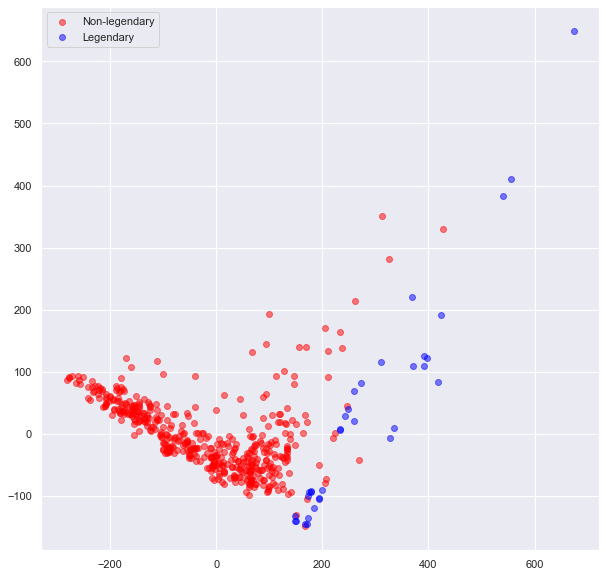

In [12]:
from sklearn.decomposition import PCA

#centralized the data
X_train_avg=X_train.mean(0)
X_test_avg=X_test.mean(0)

c_X_train= np.subtract(X_train,X_train_avg)

#make a pca with only with 2 components
num_components=2
pca_train = PCA(num_components).fit(c_X_train)
pcs_train = pca_train.fit_transform(c_X_train)



#seperate the projection data between non-legendary and legendary
legendary_list = np.where(y_train==1)
normal_list=np.where(y_train==0)

pcs_train.shape
pcs_legendary=pcs_train[legendary_list]
pcs_normal=pcs_train[normal_list]

plt.figure(figsize=(10,10))
plt.scatter(np.array(pcs_normal[:,0]), np.array(pcs_normal[:,1]), c= "red", alpha=0.5)
plt.scatter(np.array(pcs_legendary[:,0]), np.array(pcs_legendary[:,1]), c= "blue", alpha=0.5)
plt.legend(['Non-legendary','Legendary'])

### PCA Result and Discussion
PCA is applied on the logistic regression and KNN models. These models are selected because they yielded relatively low accuracy and precision scores.

To find the appropriate number of principal axis, PCA models were initially trained with 2 axes and incremented up to 15 axes, and one that gives the highest accuracy and precision scores is selected. For the logistic regression, 6 principal axes gave the highest scores. For the KNN model, 8 principal axes gave the highest scores.

Using less number of principal axes then these selected number of axes would underfit the data-set, while using more than these number of axes would overfit the data-set.

As a result, for both cases, the accuracy and precision scores are improved. 
Logistic regression model is improved from accuracy, precision score from 0.977, 0.818 to 0.995 to 0.923, and KNN model is improved from accuracy, precision scores from 0.977, 0.818 to 0.991, 0.917. The bar graph of the result is shown in Figure below.

As a conclusion, reducing the dimensions of data-set with PCA improves the classifications performance for our data-set.


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = random_state)


def pcs_calculation(num_components, cimages49, test_cimages49):
    pca = PCA(num_components)
    # projection values
    pcs_train = pca.fit_transform(cimages49)
    pcs_test = pca.transform(test_cimages49)
    return pcs_train, pcs_test

#centralized the data
X_train_avg=X_train.mean(0)
X_test_avg=X_test.mean(0)

c_X_train= np.subtract(X_train,X_train_avg)
c_X_test=np.subtract(X_test,X_test_avg)


# X Training Set from k=2, 3, 4, ..., 15
X_train= [None]*16 
X_test= [None]*16
for i in range(2,16,1):
    X_train[i], X_test[i]=pcs_calculation(i, c_X_train, c_X_test)


# logistic regression
LogReg_score_dict=dict()
LogReg_precision_dict=dict()

knn_score_dict=dict()
knn_precision_dict=dict()

for i in range (2, 16, 1):
    LogReg = LogisticRegression()
    LogReg.fit(X_train[i],y_train)
    LogReg_y_pred=LogReg.predict(X_test[i])
    LogReg_score=metrics.accuracy_score(y_test, LogReg_y_pred)
    LogReg_Precision=metrics.precision_score(y_test, LogReg_y_pred)
    LogReg_score_dict[i]=LogReg_score
    LogReg_precision_dict[i]=LogReg_Precision
    
    knn = KNeighborsClassifier(n_neighbors=3)
    knn.fit(X_train[i],y_train)
    knn_y_pred=knn.predict(X_test[i])
    knn_score=metrics.accuracy_score(y_test, knn_y_pred)
    knn_Precision=metrics.precision_score(y_test, knn_y_pred)
    knn_score_dict[i]=knn_score
    knn_precision_dict[i]=knn_Precision

for i in LogReg_score_dict:
    print(f'LogReg {i}th score: {LogReg_score_dict[i]:.3f}, Precision: {LogReg_precision_dict[i]:.3f}'   )

for i in knn_score_dict:
    print(f'knn {i}th score: {knn_score_dict[i]:.3f}, Precision: {knn_precision_dict[i]:.3f}'   )


#max(dic, key=dic.get)
Scores["LogReg+PCA"] = {'Accuracy': 0.995, 'Precision': 0.923 }
Scores["KNN+PCA"] = {'Accuracy': 0.991, 'Precision': 0.917 }

LogReg 2th score: 0.982, Precision: 0.786
LogReg 3th score: 0.982, Precision: 0.900
LogReg 4th score: 0.982, Precision: 0.900
LogReg 5th score: 0.982, Precision: 0.900
LogReg 6th score: 0.995, Precision: 0.923
LogReg 7th score: 0.995, Precision: 0.923
LogReg 8th score: 0.986, Precision: 0.909
LogReg 9th score: 0.986, Precision: 0.909
LogReg 10th score: 0.982, Precision: 0.900
LogReg 11th score: 0.991, Precision: 0.917
LogReg 12th score: 0.986, Precision: 0.909
LogReg 13th score: 0.982, Precision: 0.900
LogReg 14th score: 0.982, Precision: 0.900
LogReg 15th score: 0.986, Precision: 0.909
knn 2th score: 0.982, Precision: 0.786
knn 3th score: 0.982, Precision: 0.786
knn 4th score: 0.982, Precision: 0.786
knn 5th score: 0.977, Precision: 0.769
knn 6th score: 0.977, Precision: 0.769
knn 7th score: 0.977, Precision: 0.818
knn 8th score: 0.977, Precision: 0.818
knn 9th score: 0.982, Precision: 0.900
knn 10th score: 0.982, Precision: 0.900
knn 11th score: 0.977, Precision: 0.818
knn 12th score

C:\Users\seung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\seung\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

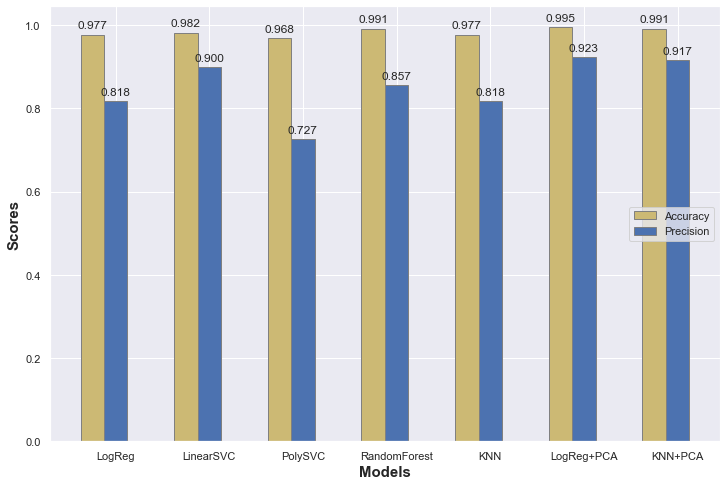

In [14]:
#Printout the final result in a bar graph

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar

accuracy_list=[]
precision_list=[]
for i in Scores:
        accuracy_list.append(Scores[i]["Accuracy"])
        precision_list.append(Scores[i]["Precision"])


# Set position of bar on X axis
br1 = np.arange(len(accuracy_list))
br2 = [x + barWidth for x in br1]


# Make the plot
bar1=plt.bar(br1, accuracy_list, color ='y', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
bar2=plt.bar(br2, precision_list, color ='b', width = barWidth,
        edgecolor ='grey', label ='Precision')

# Adding Xticks
plt.xlabel('Models', fontweight ='bold', fontsize = 15)
plt.ylabel('Scores', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(accuracy_list))],
        [i for i in Scores])

#add label
def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2., 1.01*h, '%.3f'%float(h),
                ha='center', va='bottom')

autolabel(bar1)
autolabel(bar2)


plt.legend(loc="center right")
plt.show()

## References

[1] K. Buchholz and F. Richter, “Infographic: The Pokémon Franchise Caught 'Em All,” Statista Infographics, 24-Feb-2021. [Online]. Available: https://www.statista.com/chart/24277/media-franchises-with-most-sales/. [Accessed: 17-Apr-2022]. 

[2] A. L. Zorrilla, “Pokémon for Data Mining and Machine Learning,” Kaggle, 05-Mar-2017. [Online]. Available: https://www.kaggle.com/datasets/alopez247/pokemon. [Accessed: 17-Apr-2022]. 